# Acquire Train and Test Data

Data has been gathered through the UberEats Database and it has about 45 thousand recent deliveries from different cities.

## Libraries

In [1]:
# Warnings
import warnings
warnings.filterwarnings('ignore')

# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Settings
pd.set_option('display.max_columns', None)
sns.set_style('whitegrid')
%matplotlib inline

## Loading data

In [2]:
data = pd.read_csv("/Users/veyselaytekin/Desktop/byte/Machine_Learning_Projects/lieferando_delivery_time_predictor/data/lieferando-deliveries.csv")
data

,ID,Delivery_person_ID,Delivery_person_Age,Delivery_person_Ratings,Restaurant_latitude,Restaurant_longitude,Delivery_location_latitude,Delivery_location_longitude,Order_Date,Time_Orderd,Time_Order_picked,Weatherconditions,Road_traffic_density,Vehicle_condition,Type_of_order,Type_of_vehicle,multiple_deliveries,Festival,City,Time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45588,0x7c09,JAPRES04DEL01,30,4.8,26.902328,75.794257,26.912328,75.804257,24-03-2022,11:35:00,11:45:00,conditions Windy,High,1,Meal,motorcycle,0,No,Metropolitian,(min) 32
45589,0xd641,AGRRES16DEL01,21,4.6,0.000000,0.000000,0.070000,0.070000,16-02-2022,19:55:00,20:10:00,conditions Windy,Jam,0,Buffet,motorcycle,1,No,Metropolitian,(min) 36
45590,0x4f8d,CHENRES08DEL03,30,4.9,13.022394,80.242439,13.052394,80.272439,11-03-2022,23:50:00,00:05:00,conditions Cloudy,Low,1,Drinks,scooter,0,No,Metropolitian,(min) 16
45591,0x5eee,COIMBRES11DEL01,20,4.7,11.001753,76.986241,11.041753,77.026241,07-03-2022,13:35:00,13:40:00,conditions Cloudy,High,0,Snack,motorcycle,1,No,Metropolitian,(min) 26


# Data-dictionary

|Column|Description |
| :------------ |:---------------:|
|**id**|order ID number| 
|**delivery_person_id**|ID number of the delivery partner|
|**delivery_person_age**|Age of the delivery partner|
|**delivery_person_ratings**|Ratings of the delivery partner based on past deliveries|
|**restaurant_latitude**|The latitude of the restaurant|
|**restaurant_longitude**|The longitude of the restaurant|
|**delivery_location_latitude**|The latitude of the delivery location|
|**delivery_location_longitude**|The longitude of the delivery location|
|**order_date**|Date of the order|
|**time_orderd**|Time the order was placed|
|**time_order_picked**|Time the order was picked|
|**weatherconditions**|Weather conditions of the day|
|**road_traffic_density**|Density of the traffic|
|**vehicle_condition**|Condition of the vehicle|
|**type_of_order**|The type of meal ordered by the customer|
|**type_of_vehicle**|The type of vehicle delivery partner rides|
|**multiple_deliveries**|Amount of deliveries driver picked|
|**festival**|If there was a Festival or no.|
|**city**|Type of city|
|**time_taken(min)**| The time taken by the delivery partner to complete the order|

## 1- Check the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45593 entries, 0 to 45592
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   ID                           45593 non-null  object 
 1   Delivery_person_ID           45593 non-null  object 
 2   Delivery_person_Age          45593 non-null  object 
 3   Delivery_person_Ratings      45593 non-null  object 
 4   Restaurant_latitude          45593 non-null  float64
 5   Restaurant_longitude         45593 non-null  float64
 6   Delivery_location_latitude   45593 non-null  float64
 7   Delivery_location_longitude  45593 non-null  float64
 8   Order_Date                   45593 non-null  object 
 9   Time_Orderd                  45593 non-null  object 
 10  Time_Order_picked            45593 non-null  object 
 11  Weatherconditions            45593 non-null  object 
 12  Road_traffic_density         45593 non-null  object 
 13  Vehicle_conditio

In [4]:
data.columns

Index(['ID', 'Delivery_person_ID', 'Delivery_person_Age',
       'Delivery_person_Ratings', 'Restaurant_latitude',
       'Restaurant_longitude', 'Delivery_location_latitude',
       'Delivery_location_longitude', 'Order_Date', 'Time_Orderd',
       'Time_Order_picked', 'Weatherconditions', 'Road_traffic_density',
       'Vehicle_condition', 'Type_of_order', 'Type_of_vehicle',
       'multiple_deliveries', 'Festival', 'City', 'Time_taken(min)'],
      dtype='object')

1.1. let's make all lower case

In [5]:
data.columns = data.columns.str.lower()
data.columns

Index(['id', 'delivery_person_id', 'delivery_person_age',
       'delivery_person_ratings', 'restaurant_latitude',
       'restaurant_longitude', 'delivery_location_latitude',
       'delivery_location_longitude', 'order_date', 'time_orderd',
       'time_order_picked', 'weatherconditions', 'road_traffic_density',
       'vehicle_condition', 'type_of_order', 'type_of_vehicle',
       'multiple_deliveries', 'festival', 'city', 'time_taken(min)'],
      dtype='object')

1.2. see the unique values

In [6]:
categorical_columns = data.select_dtypes(include=['object', 'category']).columns

# Kategorik sütunlardaki benzersiz değerleri döngü ile gösterin
for column in categorical_columns:
    print(f"Unique values in {column}:")
    print(data[column].unique())
    print("\n")

Unique values in id:
['0x4607 ' '0xb379 ' '0x5d6d ' ... '0x4f8d ' '0x5eee ' '0x5fb2 ']


Unique values in delivery_person_id:
['INDORES13DEL02 ' 'BANGRES18DEL02 ' 'BANGRES19DEL01 ' ...
 'KOCRES04DEL01 ' 'BHPRES06DEL03 ' 'GOARES03DEL03 ']


Unique values in delivery_person_age:
['37' '34' '23' '38' '32' '22' '33' '35' '36' '21' '24' '29' '25' '31'
 '27' '26' '20' 'NaN ' '28' '39' '30' '15' '50']


Unique values in delivery_person_ratings:
['4.9' '4.5' '4.4' '4.7' '4.6' '4.8' '4.2' '4.3' '4' '4.1' '5' '3.5'
 'NaN ' '3.8' '3.9' '3.7' '2.6' '2.5' '3.6' '3.1' '2.7' '1' '3.2' '3.3'
 '6' '3.4' '2.8' '2.9' '3']


Unique values in order_date:
['19-03-2022' '25-03-2022' '05-04-2022' '26-03-2022' '11-03-2022'
 '04-03-2022' '14-03-2022' '20-03-2022' '12-02-2022' '13-02-2022'
 '14-02-2022' '02-04-2022' '01-03-2022' '16-03-2022' '15-02-2022'
 '10-03-2022' '27-03-2022' '12-03-2022' '01-04-2022' '05-03-2022'
 '11-02-2022' '08-03-2022' '03-04-2022' '30-03-2022' '28-03-2022'
 '18-03-2022' '06-04-2022' '

## important finds about data

- the missing values is defined as **'NaN '** this space beside 'NaN ' should be removed
- End the end of values of **categorical features** there are space for examle **'Urban ', 'High ', 'motorcycle '** that should be remove
- in the values of the column **Weatherconditions** there is additionaly the word **conditions** like **'conditions Windy'**

## 2- Understanding data structure

Understanding the data structure is an essential aspect of data science projects as it plays a crucial role, because data have been organized, stored and manipulated for eficiency. 

Using the data they way it was thought to be use helps to reduce complexity, improve data quality, and enable faster and more accurate analysis.

In [7]:
data.head()

,id,delivery_person_id,delivery_person_age,delivery_person_ratings,restaurant_latitude,restaurant_longitude,delivery_location_latitude,delivery_location_longitude,order_date,time_orderd,time_order_picked,weatherconditions,road_traffic_density,vehicle_condition,type_of_order,type_of_vehicle,multiple_deliveries,festival,city,time_taken(min)
0,0x4607,INDORES13DEL02,37,4.9,22.745049,75.892471,22.765049,75.912471,19-03-2022,11:30:00,11:45:00,conditions Sunny,High,2,Snack,motorcycle,0,No,Urban,(min) 24
1,0xb379,BANGRES18DEL02,34,4.5,12.913041,77.683237,13.043041,77.813237,25-03-2022,19:45:00,19:50:00,conditions Stormy,Jam,2,Snack,scooter,1,No,Metropolitian,(min) 33
2,0x5d6d,BANGRES19DEL01,23,4.4,12.914264,77.678400,12.924264,77.688400,19-03-2022,08:30:00,08:45:00,conditions Sandstorms,Low,0,Drinks,motorcycle,1,No,Urban,(min) 26
3,0x7a6a,COIMBRES13DEL02,38,4.7,11.003669,76.976494,11.053669,77.026494,05-04-2022,18:00:00,18:10:00,conditions Sunny,Medium,0,Buffet,motorcycle,1,No,Metropolitian,(min) 21
4,0x70a2,CHENRES12DEL01,32,4.6,12.972793,80.249982,13.012793,80.289982,26-03-2022,13:30:00,13:45:00,conditions Cloudy,High,1,Snack,scooter,1,No,Metropolitian,(min) 30


- - Order_Date and Time_Orderd features can be group together

## 3- Data Cleaning

Fortunately the data is already very clean, but there are some columns that need a touch, so for this section my focus will be:

- Map all the missing values.
- Transform target (Time_taken(min)) into an int.
- Combine time features, and transform it into pd.to_datetime then engineer new features out of it.
- Change Dtypes
- Remove "condition" from Weatherconditions
- Remove spaces from str features

3.1. Mapping all the missing value from **'NaN '** to **np.nan**

In [8]:
for column in data.columns:
    data[column] = data[column].apply(lambda value: np.nan if value == 'NaN ' else value)

3.2. Tranform the target feature

In [9]:
data['time_taken(min)'] = data['time_taken(min)'].apply(lambda value: float(value[-2:]))

3.3. Combine the time variables
- Order_Date, Time_Orderd & Time_Order_picked

In [10]:
data['time_orderd'] = data['order_date'] + ' ' + data['time_orderd']
data['time_order_picked'] = data['order_date'] + ' ' + data['time_order_picked']

3.4. Convert to pd.to_datetime

In [11]:
data['time_orderd'] = pd.to_datetime(data['time_orderd'], format = '%d-%m-%Y %H:%M:%S')
data['time_order_picked'] = pd.to_datetime(data['time_order_picked'], format = '%d-%m-%Y %H:%M:%S')

3.5. Feature Engineering new variables out of Time_Orderd & Time_Order_picked

- Since direct conversion to minutes (`timedelta64[m]`) is not supported, we divide the timedelta by `np.timedelta64(1, 'm')` 
- to convert the result into minutes.

In [12]:
data['time_to_pick'] = (data['time_order_picked'] - data['time_orderd']) / np.timedelta64(1, 'm')

In [13]:
monhts = {1:'January', 2:'February', 3:'March', 4:'April', 5:'May',
          6:'June', 7:'July', 8:'August', 9:'September', 10:'October',
          11:'November', 12:'December'}

days = {0:'Monday', 1:'Tuesday', 2:'Wednesday', 3:'Thursday', 4:'Friday',
        5:'Saturday', 6:'Sunday'}

In [14]:
data['order_year'] = data['time_orderd'].apply(lambda value: value.year)
data['order_month'] = data['time_orderd'].apply(lambda value: value.month).map(monhts)
data['order_day'] = data['time_orderd'].apply(lambda value: value.dayofweek).map(days)

3.6. Change Dtypes
- float typeis compatible with NaN values

In [15]:
data['delivery_person_age'] = data['delivery_person_age'].astype(float)
data['delivery_person_ratings'] = data['delivery_person_ratings'].astype(float)
data['multiple_deliveries'] = data['multiple_deliveries'].astype(float)
data['vehicle_condition'] = data['vehicle_condition'].astype(float)

3.7. Remove "condition" from Weatherconditions

In [16]:
data['weatherconditions'] = data['weatherconditions'].apply(lambda value: value.split(' ')[-1])

3.8. Remove extra spaces

In [17]:
for feature in data.select_dtypes(include = 'O').columns:
    data[feature] = data[feature].apply(lambda value: np.nan if pd.isnull(value) else value.replace(' ', ''))

## Completing the data

Filling in missing data is important because gaps in the data can mess up the results of analyses and machine learning models. If some data is missing, it can change key numbers, like the average or spread of the data, leading to inaccurate or biased conclusions. Some types of analysis need all the data to be present to work properly.

For machine learning, missing data can cause problems, especially for models that need complete data, like decision trees and neural networks. It might also make models too focused on the existing data, making them less effective at handling new, unseen data.

By filling in missing data with estimates based on the existing data, we can maintain the data's overall characteristics and improve the performance of machine learning models. However, it's important to choose the right method for filling in the gaps and to consider how this might affect the results.

## 4. Missing Values

In [18]:
MissingValues = pd.DataFrame(data.isna().sum().sort_values(ascending = False)[:13])

MissingValues.rename(columns = {0 : 'Missing'}, inplace = True, errors = 'raise')

MissingValues['Missing %'] = round(MissingValues['Missing'] / data.shape[0] * 100, 2)

In [19]:
MissingValues

,Missing,Missing %
delivery_person_ratings,1908,4.18
delivery_person_age,1854,4.07
order_day,1731,3.80
time_orderd,1731,3.80
order_month,1731,3.80
order_year,1731,3.80
time_to_pick,1731,3.80
city,1200,2.63
multiple_deliveries,993,2.18
road_traffic_density,601,1.32


 Time_Orderd had 1731 missing values and due to that the **time engineered features** (Order_Month, Order_day, Order_Year, Time_To_Pick) also have the same amount of missing values. There is also missing values due to the Delivery person personal info, City, multiple_deliveries, Road_traffic_density and Festival.

Is necessary to ask, are these really missing values? Or there is something else hidding behind them?

In statistics there is three main types of missing data:

Missing Completely At Random (MCAR): In this case, the missing data points are randomly distributed across all observations and variables, and there is no systematic reason for the missingness. This means that the probability of a value being missing is the same for all observations, regardless of any other variables. MCAR is considered to be the least problematic type of missing data because it does not introduce any bias into the analysis.

Missing At Random (MAR): This type of missing data occurs when the probability of a value being missing is related to some observed variables, but not to the missing value itself. In other words, the missingness is dependent on some other variable in the dataset. For example, if the probability of missing a survey question is higher for people of a certain age group, but the missingness is not related to the answer to that question, then the missing data is MAR.

Missing Not At Random (MNAR): This type of missing data occurs when the probability of a value being missing is related to the missing value itself, or to some other unobserved variable. This means that the missingness is not random and cannot be explained by any of the observed variables in the dataset. MNAR is considered to be the most problematic type of missing data because it can introduce bias into the analysis. An example of MNAR is when participants with high levels of depression are less likely to complete a survey on mental health, leading to missing data that is systematically related to the variable being measured.

Many imputation methods can introduce bias if the missing data is not missing completely at random (MCAR) or missing at random (MAR), meaning that the missingness is not related to the value of the missing data. In such cases, the imputation method can produce biased estimates of the missing data values.

So in order to implement any imputation method, I need to be sure that the missing data is MCAR or MAR. There are a few ways to check if your missing data is not missing completely at random (MCAR) or missing at random (MAR):

Visual inspection: You can plot the missing values to see if there is a pattern to their occurrence. For example, if missing values tend to occur more often in certain rows or columns, or in certain values of other variables, this may indicate that the missingness is not random.

Statistical tests: You can perform statistical tests to check for patterns in the missing data. One common test is the Little's MCAR test, which tests whether the missingness is independent of the observed data. If the p-value of the test is less than 0.05, it indicates that the data is not MCAR.

Let's check if our missing data its MCAR or MAR and fill the values in case data is MNAR

4.1. Visual inspection:

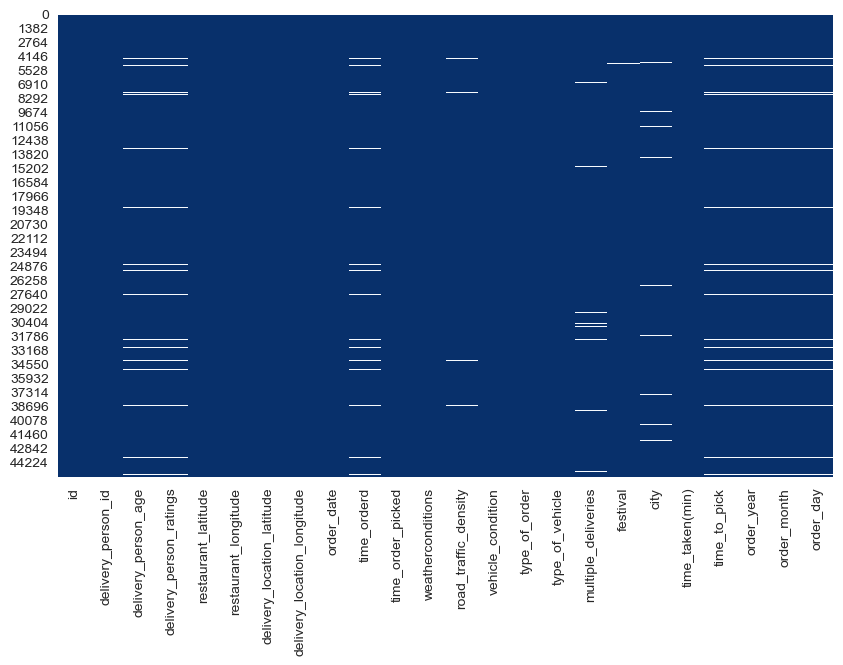

In [20]:
plt.figure(figsize = (10, 6))

sns.heatmap(data.isna(), cmap = 'Blues_r', cbar = False);

- Some rows have multiple missing values, lets check how many values and if they have something to do with the delivery time

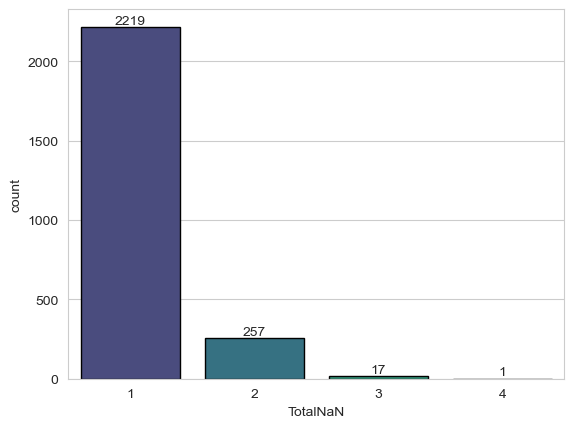

In [33]:
# Calculate the total number of NaNs per row
data['TotalNaN'] = data.isna().sum(axis=1)

# Create the count plot
ax = sns.countplot(data=data[data.TotalNaN != 0], x='TotalNaN', palette='viridis', edgecolor='k')

# Add count labels above each bar
for index, value in enumerate(data[data.TotalNaN != 0]['TotalNaN'].value_counts().sort_index()):
    ax.text(index, value, str(value), ha='center', va='bottom')

# Display the plot
plt.show()

In [22]:
# Rows with more than 5 NaN values

data[data['TotalNaN'] > 5].isna().sum().sort_values(ascending = False)[:12]

order_day                  1731
order_month                1731
order_year                 1731
time_to_pick               1731
time_orderd                1731
delivery_person_age        1640
delivery_person_ratings    1640
road_traffic_density        601
city                         56
multiple_deliveries          50
festival                      9
type_of_order                 0
dtype: int64

- Those rows with more than 5 missing values are not worth imputing since 6 or more (up to 10) missing values are out of 16 predicting features is way too much, 

- so I am gonna remove those rows with more than 5 missing values and impute those with less than that.

In [23]:
# Number of Observations dropped

data.shape[0] - data[data['TotalNaN'] < 5].shape[0]

1731

In [24]:
data = data[data['TotalNaN'] < 5]

After dropping those variables, lets see how the missing values in the data looks like.

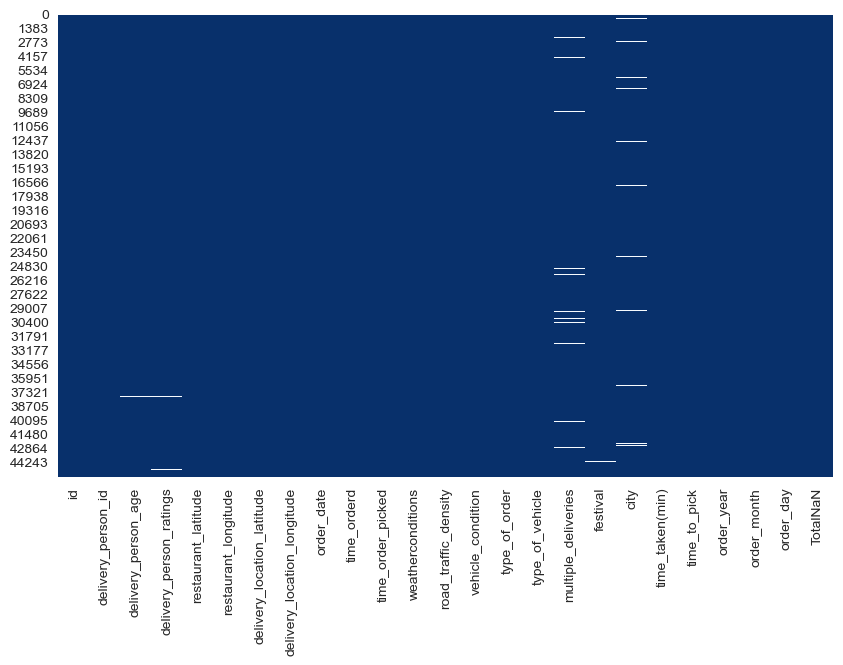

In [25]:
plt.figure(figsize = (10, 6))

sns.heatmap(data.isna(), cmap = 'Blues_r', cbar = False);

In [26]:
MissingValues = pd.DataFrame(data.isna().sum().sort_values(ascending = False)[:7])

MissingValues.rename(columns = {0 : 'Missing'}, inplace = True, errors = 'raise')

MissingValues['Missing %'] = round(MissingValues['Missing'] / data.shape[0] * 100, 2)

MissingValues

,Missing,Missing %
city,1144,2.61
multiple_deliveries,943,2.15
delivery_person_ratings,268,0.61
festival,219,0.50
delivery_person_age,214,0.49
id,0,0.00
type_of_order,0,0.00



- Now we have less than 5% of missing values, lets see if I can fill those values using the Mode from the data if value count is unbalanced or any other method. 

- First of all I am gonna create a function to help me map the current Missing Values of each feature.

4.2. City column

The City feature is that has  most missing value with around %2.61 of data set

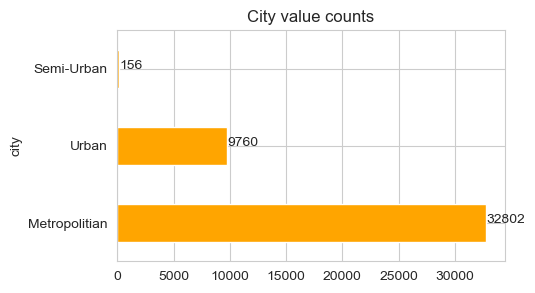

In [32]:
# Plotting the bar chart
ax = data.city.value_counts().plot(kind='barh', title='City value counts', color='orange', figsize=(5, 3))

# Adding the values above the bars
for index, value in enumerate(data.city.value_counts()):
    ax.text(value, index, str(value))

# Display the plot
plt.show()

City feature is unbalanced and the better option is to impute that with Mode, in this case 'Metropolitan'

In [38]:
data['TotalNaN'] = data.isna().sum(axis = 1)
data['TotalNaN']

0        0
1        0
2        0
3        0
4        0
        ..
45588    0
45589    0
45590    0
45591    0
45592    0
Name: TotalNaN, Length: 43862, dtype: int64

In [35]:
data.city.isna().sum()
# There are 1144 missing values in city feature

1144

In [36]:
data.loc[data['city'].isna(), 'city'] = 'Metropolitian'